In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# Read the CSV files
df1 = pd.read_csv('cnames.csv')
df2 = pd.read_csv('non_cnames.csv')



Label with cname

In [10]:
# Get the smaller dataset size to balance classes
min_samples = min(len(df1), len(df2))

# Sample equal number of records from each dataset
cnames_df = df1.sample(n=min_samples, random_state=42)
non_cnames_df = df2.sample(n=min_samples, random_state=42)

# Remove regex characters from rules
cnames_df['rule'] = cnames_df['rule'].str.replace('\.', ' ')
cnames_df['rule'] = cnames_df['rule'].str.replace('\/', ' ')
non_cnames_df['rule'] = non_cnames_df['rule'].str.replace('\.', ' ')
non_cnames_df['rule'] = non_cnames_df['rule'].str.replace('\/', ' ')
cnames_df['rule'] = cnames_df['rule'].str.replace('\\', ' ')
non_cnames_df['rule'] = non_cnames_df['rule'].str.replace('\\', ' ')


# Label the data
cnames_df['label'] = 1
non_cnames_df['label'] = 0

print(f"Number of samples per class: {min_samples}")


<>:9: SyntaxWarning: invalid escape sequence '\.'
<>:10: SyntaxWarning: invalid escape sequence '\/'
<>:11: SyntaxWarning: invalid escape sequence '\.'
<>:12: SyntaxWarning: invalid escape sequence '\/'
<>:9: SyntaxWarning: invalid escape sequence '\.'
<>:10: SyntaxWarning: invalid escape sequence '\/'
<>:11: SyntaxWarning: invalid escape sequence '\.'
<>:12: SyntaxWarning: invalid escape sequence '\/'
C:\Users\Emma\AppData\Local\Temp\ipykernel_40396\2944382997.py:9: SyntaxWarning: invalid escape sequence '\.'
  cnames_df['rule'] = cnames_df['rule'].str.replace('\.', ' ')
C:\Users\Emma\AppData\Local\Temp\ipykernel_40396\2944382997.py:10: SyntaxWarning: invalid escape sequence '\/'
  cnames_df['rule'] = cnames_df['rule'].str.replace('\/', ' ')
C:\Users\Emma\AppData\Local\Temp\ipykernel_40396\2944382997.py:11: SyntaxWarning: invalid escape sequence '\.'
  non_cnames_df['rule'] = non_cnames_df['rule'].str.replace('\.', ' ')
C:\Users\Emma\AppData\Local\Temp\ipykernel_40396\2944382997.py:12

Number of samples per class: 85387


In [11]:
# Combine the dataframes
df = pd.concat([cnames_df, non_cnames_df], ignore_index=True)

# split test and train
train_df = df.sample(frac=0.8, random_state=42)
test_df = df.drop(train_df.index)


In [12]:
from sklearn.linear_model import LogisticRegression

# Create features from the rule column
X = train_df['rule']
y = train_df['label']

# Create the pipeline with TF-IDF
tfidf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer='char', ngram_range=(3,5)))
])

# Fit and transform the data
X_tfidf = tfidf_pipeline.fit_transform(X)

# train the model
model = LogisticRegression()
model.fit(X_tfidf, y)

# test the model
X_test = test_df['rule']
y_test = test_df['label']
X_test_tfidf = tfidf_pipeline.transform(X_test)
predictions = model.predict(X_test_tfidf)
accuracy = (predictions == y_test).mean()
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.95


In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score

# calculate precision, recall, and f1 score
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")


Precision: 0.95, Recall: 0.95, F1 Score: 0.95


Label with fingerprint

In [14]:

# Create new label based on fingerprint field
df1['label'] = (df1['fingerprint'] >= 2).astype(int)
df2['label'] = (df2['fingerprint'] >= 2).astype(int)

# Count number of 0 and 1 labels in each dataframe
print("\nLabel counts in df1:")
print(f"Number of non-fingerprinting (0): {len(df1[df1['label'] == 0])}")
print(f"Number of fingerprinting (1): {len(df1[df1['label'] == 1])}")

print("\nLabel counts in df2:")
print(f"Number of non-fingerprinting (0): {len(df2[df2['label'] == 0])}")
print(f"Number of fingerprinting (1): {len(df2[df2['label'] == 1])}")




Label counts in df1:
Number of non-fingerprinting (0): 82922
Number of fingerprinting (1): 2465

Label counts in df2:
Number of non-fingerprinting (0): 440512
Number of fingerprinting (1): 19539


In [15]:
# Combine the dataframes
df_fgpr = pd.concat([df1, df2], ignore_index=True)

# split test and train
train_df2 = df_fgpr.sample(frac=0.8, random_state=42)
test_df2 = df_fgpr.drop(train_df2.index)


In [18]:
from sklearn.linear_model import LogisticRegression

# Create features from the rule column
X2 = train_df2['rule']
y2 = train_df2['label']

# Create the pipeline with TF-IDF
tfidf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer='char', ngram_range=(3,5)))
])

# Fit and transform the data
X2_tfidf = tfidf_pipeline.fit_transform(X2)

# train the model
model = LogisticRegression()
model.fit(X2_tfidf, y2)

# test the model
X2_test = test_df2['rule']
y2_test = test_df2['label']
X2_test_tfidf = tfidf_pipeline.transform(X2_test)
predictions = model.predict(X2_test_tfidf)

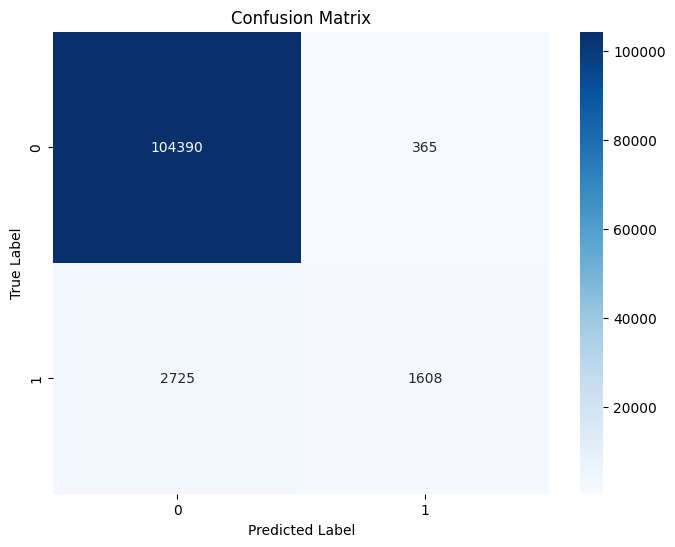

In [25]:
# create confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y2_test, predictions)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()



In [22]:
# calculate accuracy, precision, recall, and f1 score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y2_test, predictions)
precision = precision_score(y2_test, predictions)
recall = recall_score(y2_test, predictions)
f1 = f1_score(y2_test, predictions)
print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")



Accuracy: 0.97, Precision: 0.82, Recall: 0.37, F1 Score: 0.51
